In [3]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.dates
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import mstats

In [3]:
# better to remove all the irrelavent columns first
df = pd.read_excel("PBR1.xlsx")

In [4]:
df.head()

,Index,Date,Time,T,pH,M,Dry pellet,DW
0,1,2021-06-15,15:03:00,37.07,9.7,13.0,0.035,2.692308
1,2,2021-06-16,14:10:00,35.94,9.84,13.0,0.042,3.230769
2,3,2021-06-17,14:05:00,35.93,9.85,13.0,0.044,3.384615
3,4,2021-06-18,14:23:00,35.98,9.72,12.0,0.054,4.500000
4,5,2021-06-19,17:25:00,35.56,9.84,13.0,0.075,5.769231


In [5]:
len(df["Date"])

333

In [6]:
#for the Time and DW column, need to check if there are any nulls as these two variables are important for plotting
df_new = df.dropna(subset = ["DW"])
df_new = df.dropna(subset = ["Time"])

In [7]:
#df_new.to_excel("processed_PBR1.xlsx")
# processed PBR1 has some error in time (format error), manually fixed it (4 in total), drop one null value
df = pd.read_excel("processed_PBR1.xlsx")
#df = df.dropna(subset = ["DW"])

In [8]:
# combine Date and Time, so can be plotted (some of the records happened in the same day so cannot be plotted solely 
# based on dates)
time = []
for i in range(len(df["Date"])):
    temp = datetime.strptime(str(df["Date"][i])[:10], "%Y-%m-%d").strftime("%Y-%m-%d")+" "+str(df["Time"][i])
    temp = datetime.fromisoformat(temp)
    time.append(temp)
df["Datetime"]=time

<AxesSubplot:xlabel='Datetime'>

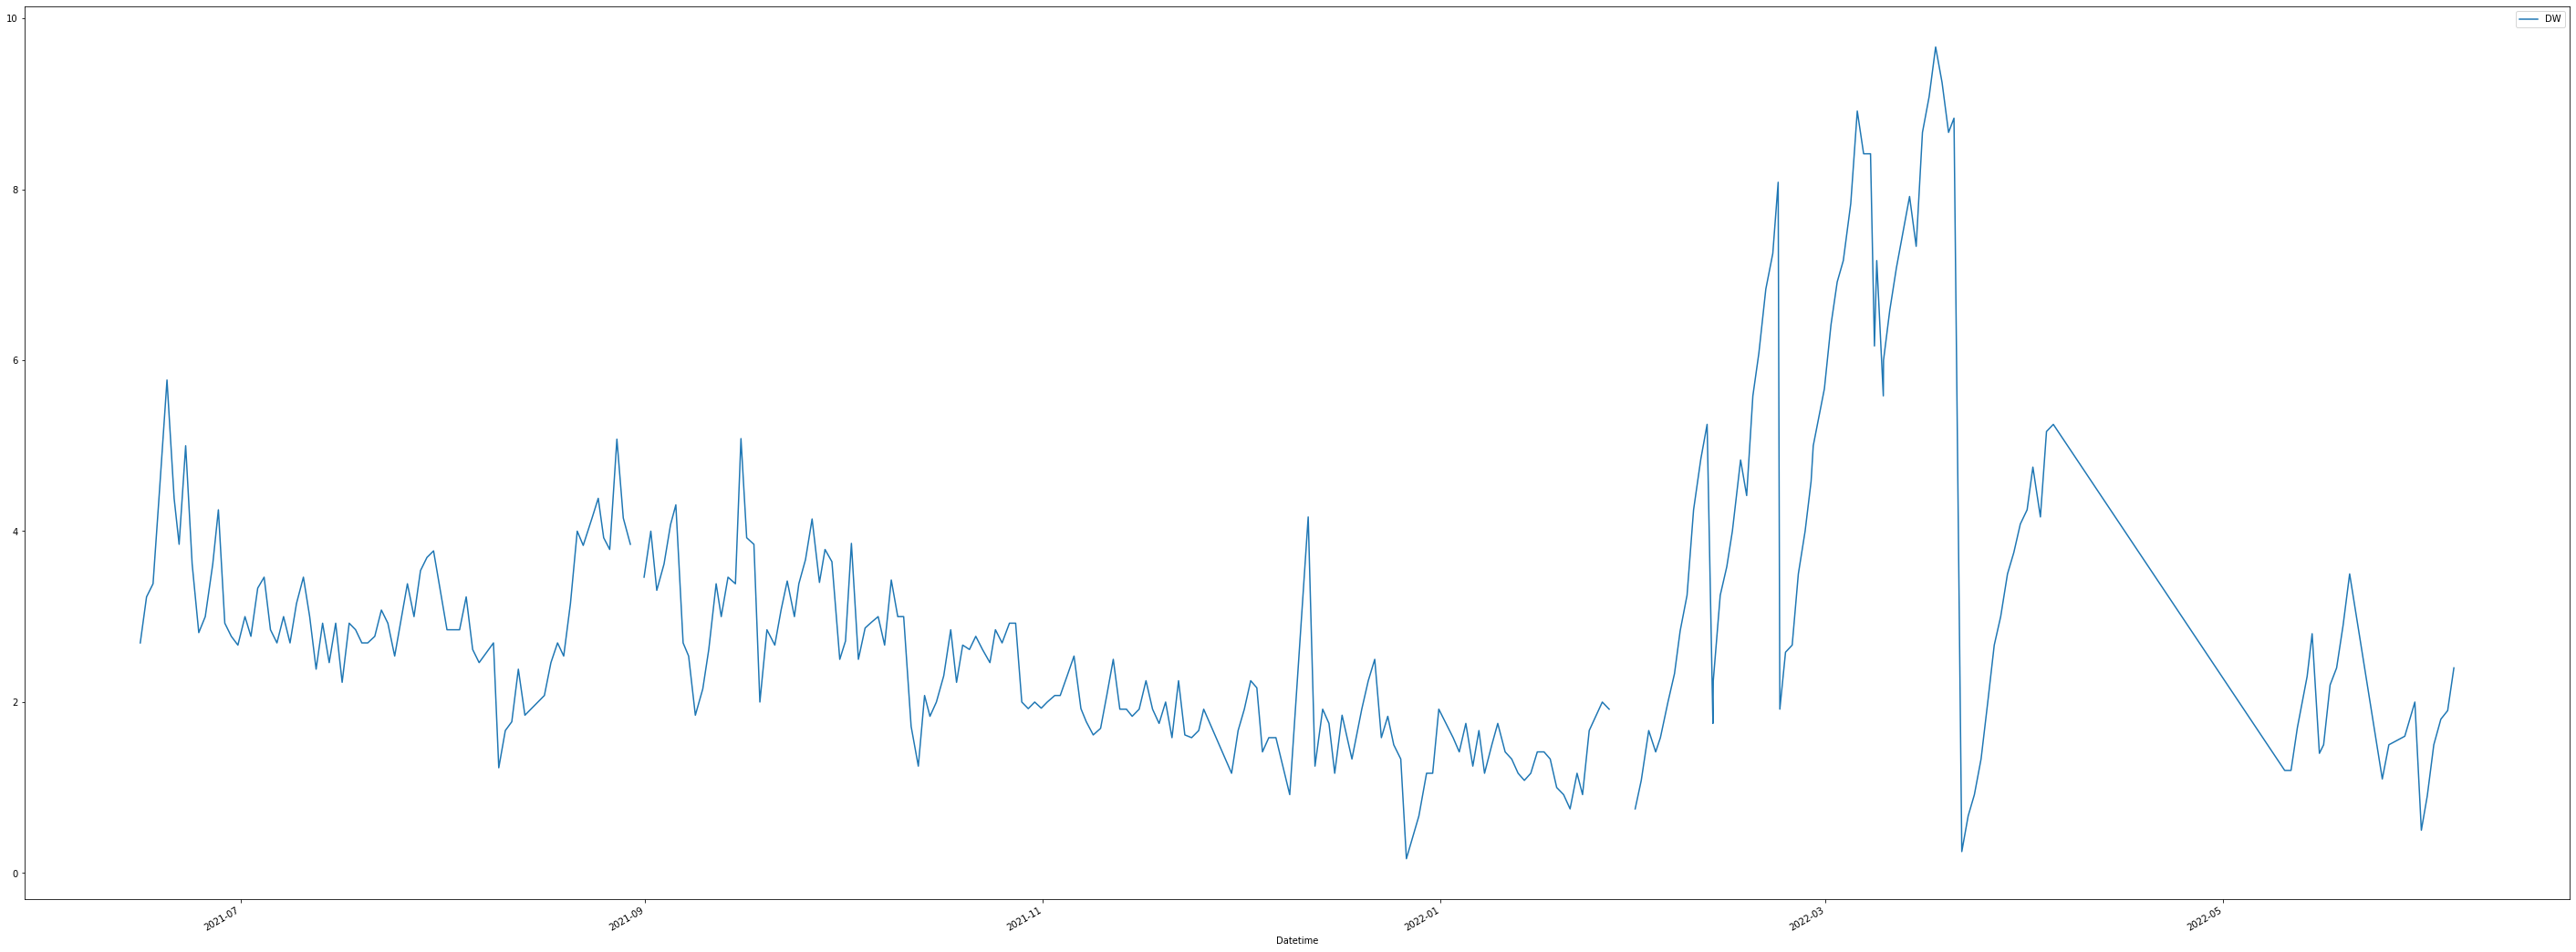

In [9]:
df.plot("Datetime","DW",figsize=(50,20))

most of the data is affected by the daily harvest therefore we will only choose the period that is not affected by the harvest. There are several harvest/ split happened on:
- 2022-02-11: remixed, new start
- 2022-02-21: split 4L and start 3rd trial
- 2022-03-08： replaced 3144ml media 
- 2022-03-20: harvest all
- 2022-04-04: full harvest

In [10]:
#for those turning points, find the index so we could split the plot
df.loc[df['Date'] == "2022-01-30"]

,Unnamed: 0,Index,Date,Time,T,pH,M,Dry pellet,DW,Datetime
213,229,230,2022-01-30,19:35:00,34.01,7.66,12,0.009,0.75,2022-01-30 19:35:00


In [11]:
df.loc[df['Date'] == "2022-02-11"]

,Unnamed: 0,Index,Date,Time,T,pH,M,Dry pellet,DW,Datetime
225,241,242,2022-02-11,17:40:00,34.83,9.59,12,0.021,1.75,2022-02-11 17:40:00
226,242,243,2022-02-11,19:00:00,33.02,9.56,12,0.027,2.25,2022-02-11 19:00:00


In [12]:
df.loc[df['Date'] == "2022-02-21"]

,Unnamed: 0,Index,Date,Time,T,pH,M,Dry pellet,DW,Datetime
236,252,253,2022-02-21,17:45:00,33.82,9.66,12,0.097,8.083333,2022-02-21 17:45:00
237,253,254,2022-02-21,23:55:00,20.90,9.37,12,0.023,1.916667,2022-02-21 23:55:00


In [13]:
df.loc[df['Date'] == "2022-03-08"]

,Unnamed: 0,Index,Date,Time,T,pH,M,Dry pellet,DW,Datetime
252,268,269,2022-03-08,12:00:00,30.47,9.44,12,0.074,6.166667,2022-03-08 12:00:00
253,269,270,2022-03-08,20:30:00,34.83,9.47,12,0.086,7.166667,2022-03-08 20:30:00


In [14]:
df.loc[df['Date'] == "2022-03-20"]

,Unnamed: 0,Index,Date,Time,T,pH,M,Dry pellet,DW,Datetime
267,283,284,2022-03-20,16:40:00,34.86,9.68,12,0.106,8.833333,2022-03-20 16:40:00


In [15]:
df.loc[df['Date'] == "2022-04-04"]

,Unnamed: 0,Index,Date,Time,T,pH,M,Dry pellet,DW,Datetime
282,298,299,2022-04-04,22:10:00,34.95,9.69,12,0.063,5.25,2022-04-04 22:10:00


In [16]:
df_interval_1 = df.loc[(df['Index'] >= 230) & (df['Index'] <= 241)]
df_interval_2 = df.loc[(df['Index'] >= 242) & (df['Index'] <= 253)]
df_interval_3 = df.loc[(df['Index'] >= 254) & (df['Index'] <= 268)]
df_interval_4 = df.loc[(df['Index'] >= 269) & (df['Index'] <= 284)]
df_interval_5 = df.loc[(df['Index'] >= 285) & (df['Index'] <= 299)]

In [41]:
#shift the index range from current index to 0 (shift the window)
def shift_index(interval):
    new_interval = []
    for i in range(len(interval)):
        new_interval.append(i)
    return new_interval

Text(0.5, 1.0, 'From 2022-01-30 to 2022-02-10')

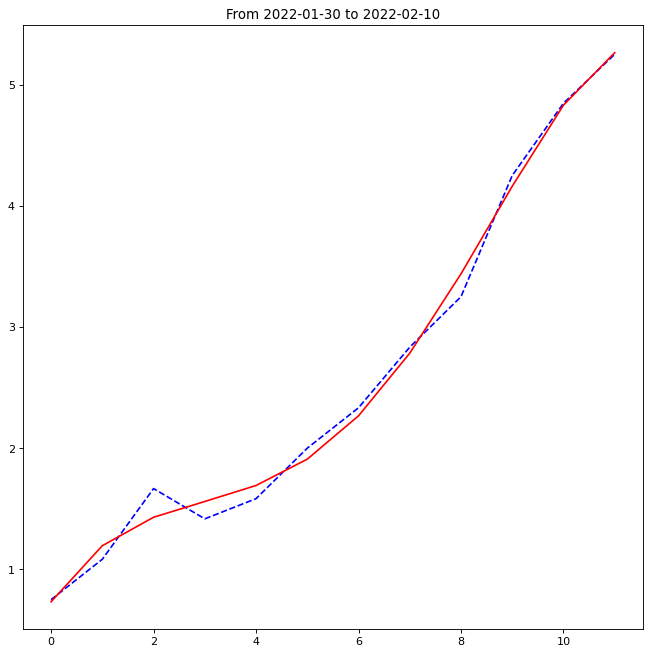

In [43]:
# polyfit
# interval 1
degree = 5
x = shift_index(df_interval_1["Index"])
y = df_interval_1["DW"]
theta = np.polyfit(x,y, deg= degree)
model1 = np.poly1d(theta)

figure(figsize=(10, 10), dpi=80)
plt.plot(x, y, 'b--')
plt.plot(x, model1(x),'r')
plt.title("From 2022-01-30 to 2022-02-10")

Text(0.5, 1.0, 'From 2022-02-11 to 2022-02-21')

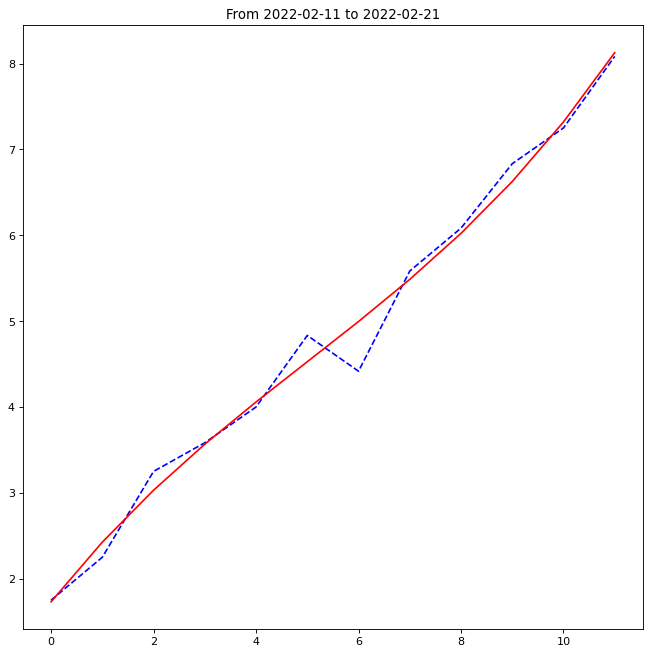

In [44]:
# polyfit
# interval 2
degree = 3
x = shift_index(df_interval_2["Index"])
y = df_interval_2["DW"]
theta = np.polyfit(x,y, deg= degree)
model2 = np.poly1d(theta)

figure(figsize=(10, 10), dpi=80)
plt.plot(x, y, 'b--')
plt.plot(x, model2(x),'r')
plt.title("From 2022-02-11 to 2022-02-21")

Text(0.5, 1.0, 'From 2022-02-21 to 2022-03-08')

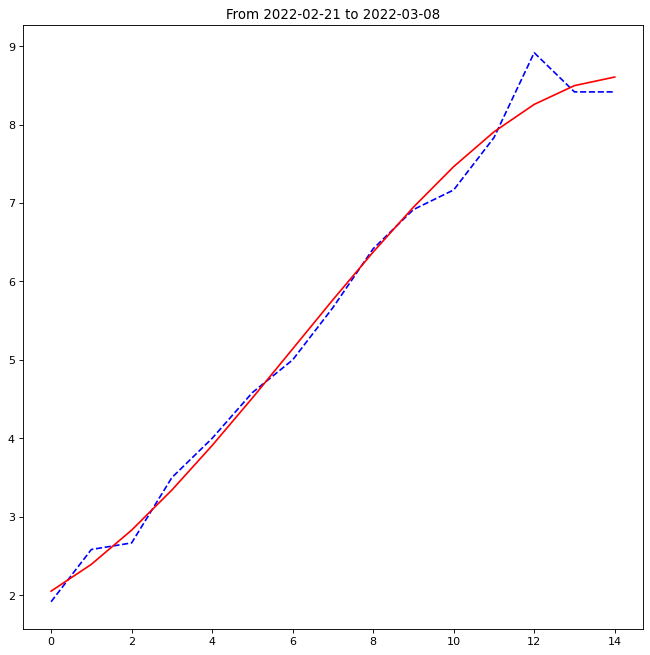

In [45]:
# polyfit
# interval 3
degree = 3
x = shift_index(df_interval_3["Index"])
y = df_interval_3["DW"]
theta = np.polyfit(x,y, deg= degree)
model3 = np.poly1d(theta)

figure(figsize=(10, 10), dpi=80)
plt.plot(x, y, 'b--')
plt.plot(x, model3(x),'r')
plt.title("From 2022-02-21 to 2022-03-08")

Text(0.5, 1.0, 'From 2022-03-08 to 2022-03-20')

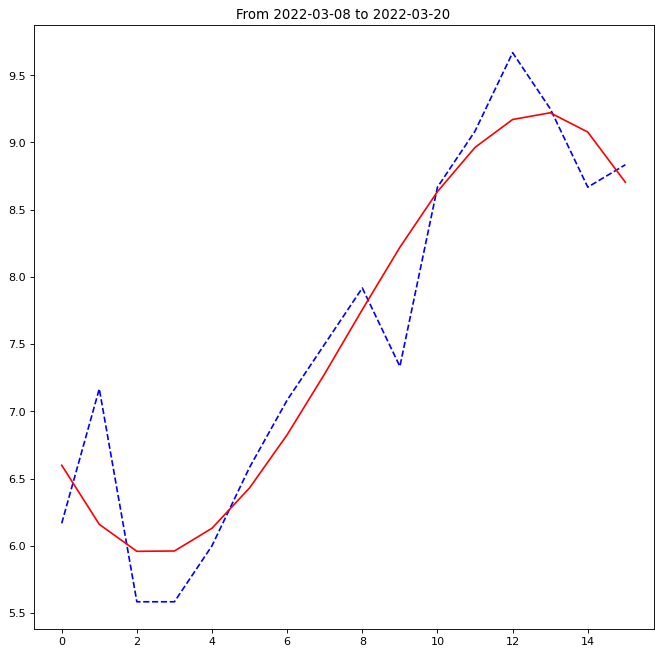

In [46]:
# polyfit
# interval 4
degree = 3
x = shift_index(df_interval_4["Index"])
y = df_interval_4["DW"]
theta = np.polyfit(x,y, deg= degree)
model4 = np.poly1d(theta)

figure(figsize=(10, 10), dpi=80)
plt.plot(x, y, 'b--')
plt.plot(x, model4(x),'r')
plt.title("From 2022-03-08 to 2022-03-20")

Text(0.5, 1.0, 'From 2022-03-20 to 2022-04-04')

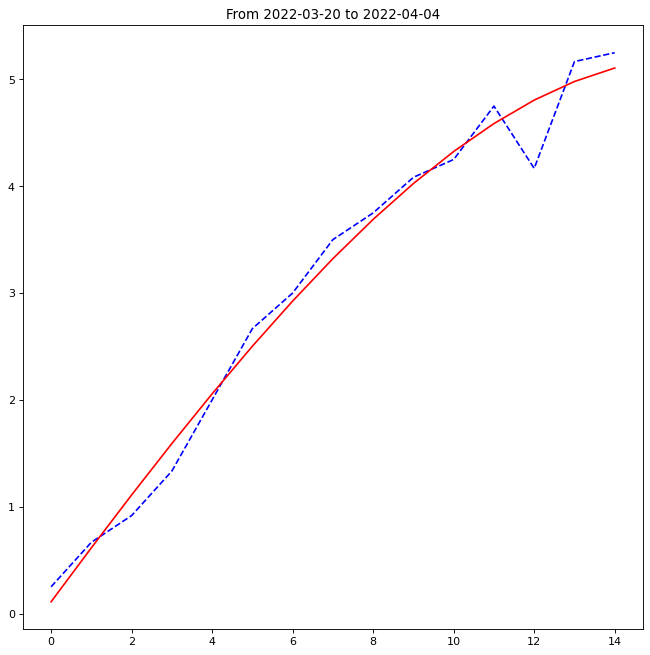

In [47]:
# polyfit
# interval 4
degree = 3
x = shift_index(df_interval_5["Index"])
y = df_interval_5["DW"]
theta = np.polyfit(x,y, deg= degree)
model5 = np.poly1d(theta)

figure(figsize=(10, 10), dpi=80)
plt.plot(x, y, 'b--')
plt.plot(x, model5(x),'r')
plt.title("From 2022-03-20 to 2022-04-04")

reason using degree 3: fitting the S-curve

5 growth cycles with interruptions at the end

should attempt to plot a growth-rate vs density graph, growth-rate will be done in a minimum interval of 1min.

since one index represent 1 day, it will be divided by 60x24 = 1440

In [48]:
# focus on model 1 first
# for optimization： need to consider:
# - interval of harvesting t (in min)
# - volume amount harvesting v (volume in ml)
# - level of density when harvesting p
# Assume maximize the harvest amount by 1 year.
# number of harvesting N = 365*1440/t
# mass obtained m = p*v
# new level of density p1 = (10-v)p/10
# objective function: M = N*(p*v)
# constraints: growth rate at p1*t*growth_rate = p
# cost per harvest and total expected budget?kij

# therefore, need a growth rate function in terms of density 
# target variable：time t, volume v, density p

In [50]:
# growth rate will be determined based on 1 min, meaning growth rate r = (model(0+1/1440)-model(0))
density = []
rate = []
for i in range((len(df_interval_1["Index"])-1)*1440):
    den = model1(i/1440)
    r = (model1((i+1)/1440)-den)
    density.append(den)
    rate.append(r)

Text(0.5, 1.0, 'rate vs density')

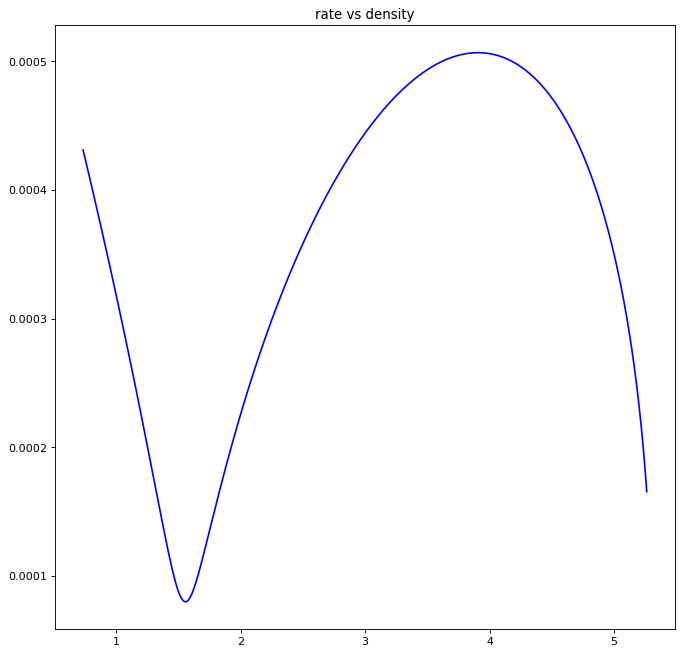

In [54]:
figure(figsize=(10, 10), dpi=80)
plt.plot(density, rate, 'b')
plt.title("rate vs density")

In [60]:
# for the entire experiment, create a dataframe and get density and rate, for those density with several rates
# use the average. save each experiment results into dictionary first
# density value is the key and growth rate r is the value
result = {}
for i in range((len(df_interval_1["Index"])-1)*1440):
    den = model1(i/1440)
    r = (model1((i+1)/1440)-den)
    result[den] = r

for i in range((len(df_interval_2["Index"])-1)*1440):
    den = model2(i/1440)
    r = (model2((i+1)/1440)-den)
    result[den] = r

for i in range((len(df_interval_3["Index"])-1)*1440):
    den = model3(i/1440)
    r = (model3((i+1)/1440)-den)
    result[den] = r
    
for i in range((len(df_interval_4["Index"])-1)*1440):
    den = model4(i/1440)
    r = (model4((i+1)/1440)-den)
    result[den] = r
    
for i in range((len(df_interval_5["Index"])-1)*1440):
    den = model5(i/1440)
    r = (model5((i+1)/1440)-den)
    result[den] = r
len(result)

93600

In [126]:
keys = result.keys()
values = result.values()
df_plot = pd.DataFrame({"Density": keys, "Growth_Rate": values})
df_plot.to_excel("Rate vs Density.xlsx")

## determine the relationship between rate and density

In [144]:
df = pd.read_excel("Rate vs Density.xlsx")
df.head(10)

,Unnamed: 0,Density,Growth_Rate
0,0,0.732553,0.000431
1,1,0.732984,0.000431
2,2,0.733415,0.000431
3,3,0.733845,0.000430
4,4,0.734276,0.000430
5,5,0.734706,0.000430
6,6,0.735136,0.000430
7,7,0.735566,0.000430
8,8,0.735996,0.000430
9,9,0.736426,0.000429


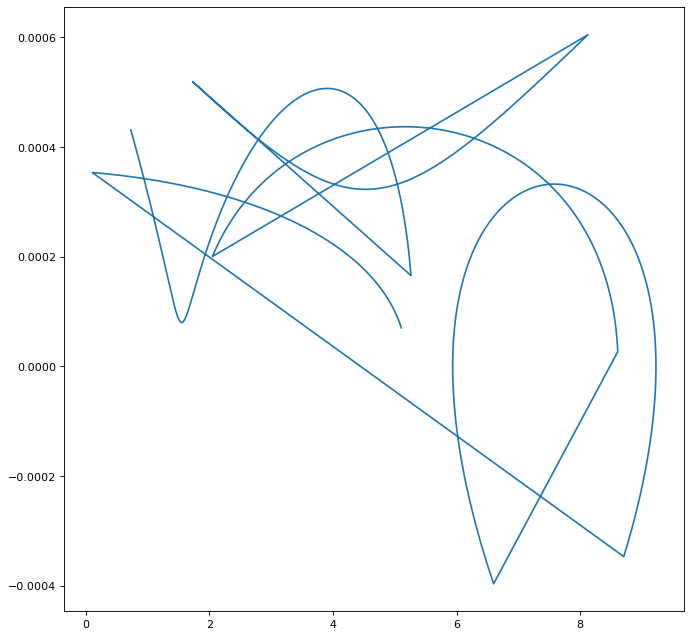

In [145]:
figure(figsize=(10, 10), dpi=80)
plt.plot(df["Density"], df["Growth_Rate"])
plt.show()

In [146]:
# requires round-up to eliminate duplicates
df = df.sort_values(by=['Density'])

In [147]:
df["Density"]=df["Density"].round(decimals = 2)

In [148]:
if (df.loc[df["Density"]==10.11].empty):
    print("True")
else:
    print("False")

True


In [149]:
df_final = pd.DataFrame({"Density": [], "Growth_Rate_Mean":[], "Growth_Rate_Median":[]})
df_final

,Density,Growth_Rate


In [150]:
seed = 0.11
density = []
while seed <=9.22:
    density.append(seed)
    seed = round(seed+0.01,2)

In [151]:
df_final["Density"]=density
df_final

,Density,Growth_Rate
0,0.11,NaN
1,0.12,NaN
2,0.13,NaN
3,0.14,NaN
4,0.15,NaN
...,...,...
907,9.18,NaN
908,9.19,NaN
909,9.20,NaN
910,9.21,NaN


In [153]:
for i in range(len(df_final["Density"])):
    #if there is no corresponding growth rate for this density, return 0
    if df.loc[df["Density"]==df_final["Density"][i]].empty:
        df_final["Growth Rate"][i]=0
    else:
        #if there is multiple values corresponding to the density, winsorize all the growth rate
        #values (taking only values between 5% and 95% confidence interval), and then choose median to 
        #represent the growth rate for the corresponding density.
        df_temp = df.loc[df["Density"]==df_final["Density"][i]]
        P = np.percentile(df_temp.Growth_Rate, [5, 95])
        df_temp = df_temp[(df_temp.Growth_Rate> P[0]) & 
                          (df_temp.Growth_Rate < P[1])]
        median = df_temp["Growth_Rate"].median()
        df_final["Growth_Rate"][i]=median
df_final

,Density,Growth_Rate
0,0.11,3.533045e-04
1,0.12,3.532332e-04
2,0.13,3.531378e-04
3,0.14,3.530417e-04
4,0.15,3.529463e-04
...,...,...
907,9.18,8.037560e-05
908,9.19,6.985783e-05
909,9.20,5.713190e-05
910,9.21,3.996138e-05


In [154]:
df_final.to_excel("Density vs Growth.xlsx")

In [4]:
df = pd.read_excel("Density vs Growth.xlsx")
df

,Unnamed: 0,Density,Growth_Rate
0,0,0.11,3.533045e-04
1,1,0.12,3.532332e-04
2,2,0.13,3.531378e-04
3,3,0.14,3.530417e-04
4,4,0.15,3.529463e-04
...,...,...,...
907,907,9.18,8.037560e-05
908,908,9.19,6.985783e-05
909,909,9.20,5.713190e-05
910,910,9.21,3.996138e-05


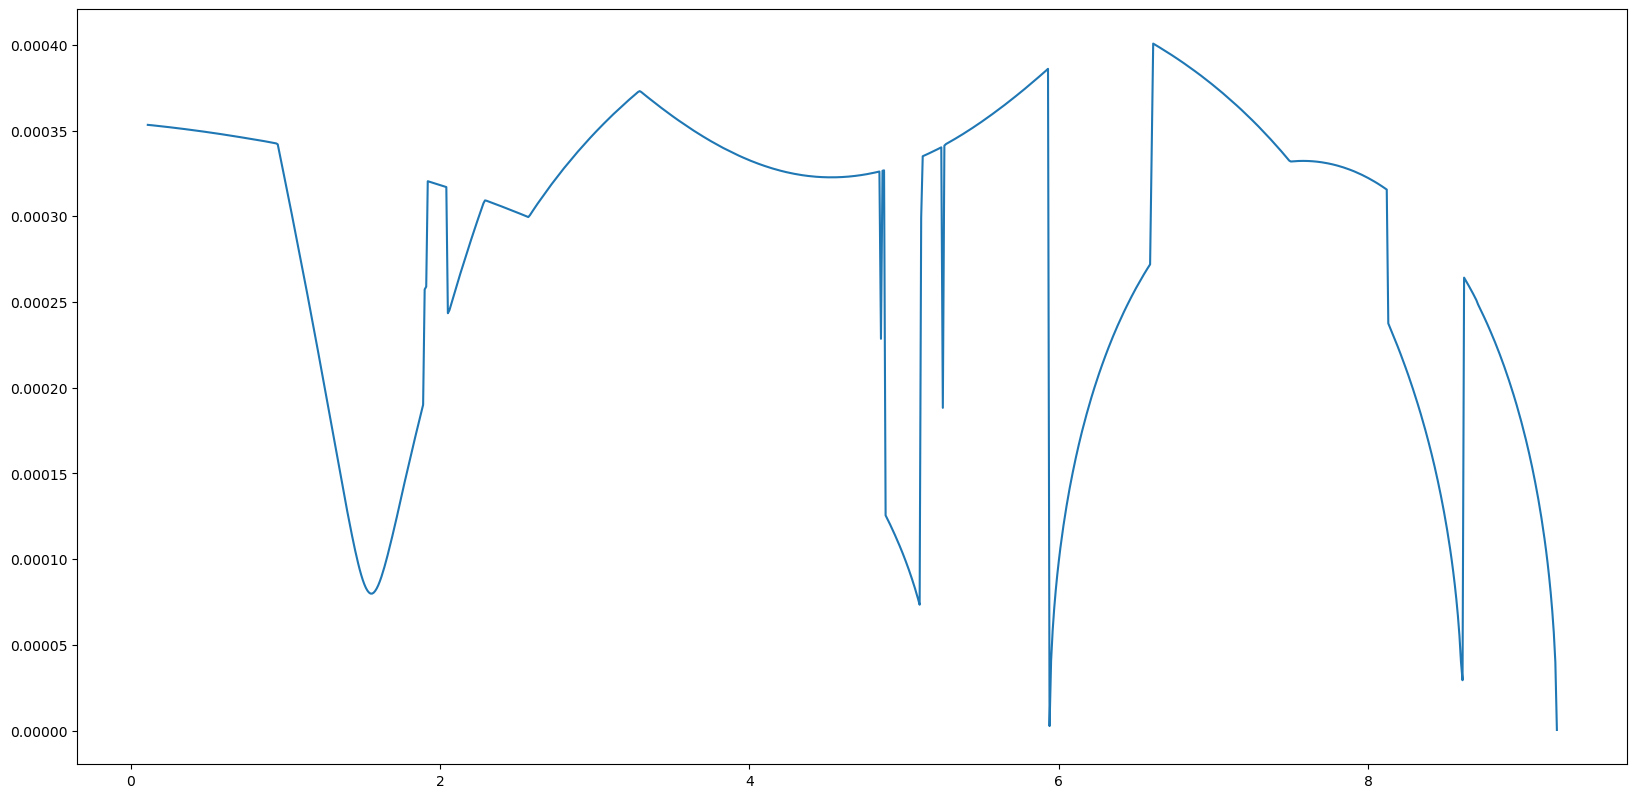

In [5]:
figure(figsize=(20, 10), dpi=100)
plt.plot(df["Density"], df["Growth_Rate"])
plt.show()

C:\Users\timwy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


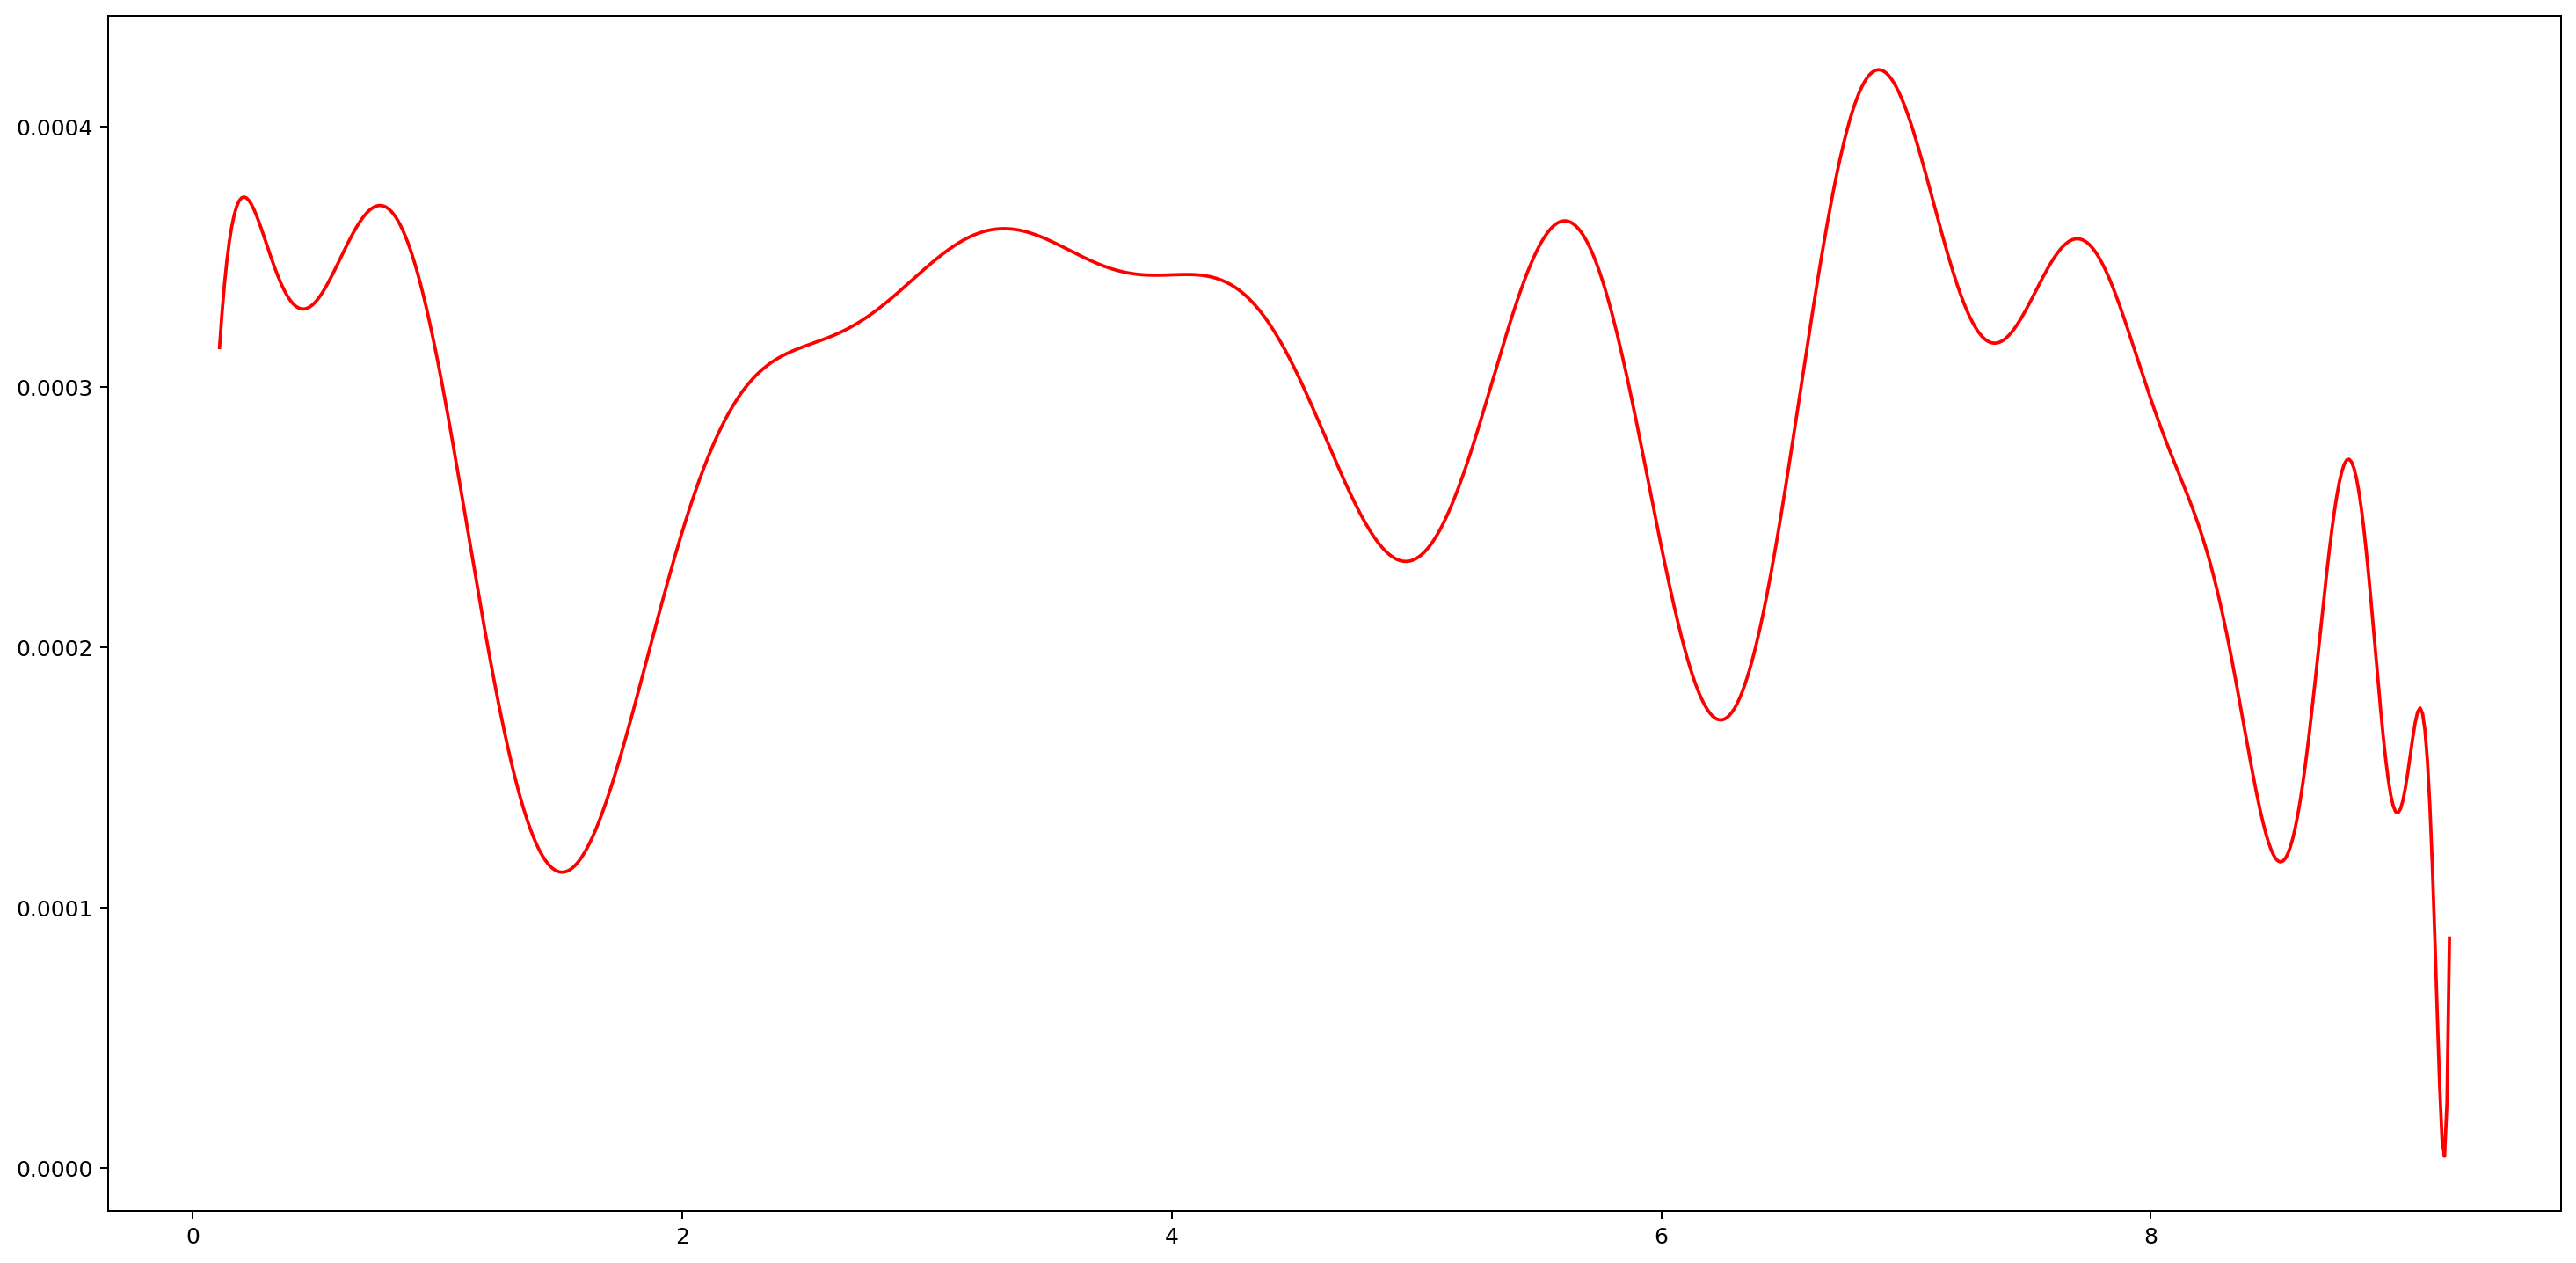

In [7]:
degree = 50
x = df["Density"]
y = df["Growth_Rate"]
theta = np.polyfit(x,y, deg= degree)
model_plot = np.poly1d(theta)

figure(figsize=(20, 10), dpi=180)
#plt.plot(x, y, 'b--')
plt.plot(x, model_plot(x),'r')